# Titanic prediction

## Importing the libraries

In [1]:
import pandas as pd
import numpy as n
import matplotlib.pyplot as plt
import seaborn as sns
import csvp

## Importing the dataset

In [2]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
result = pd.read_csv('gender_submission.csv
dataset = [data_train, data_test]')

## Analyze data

In [3]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
data_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot:>

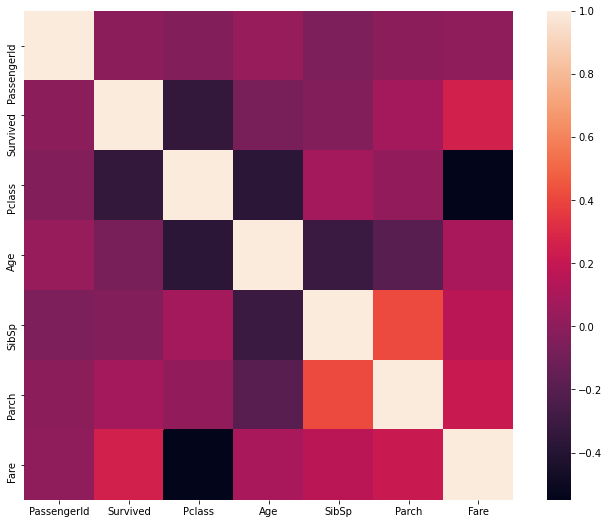

In [7]:
plt.subplots(figsize=(12, 9))
sns.heatmap(data_train.corr(), square  = True)

## Cleaning data

Dealing with the missing data

In [8]:
for data in dataset:
    data['Age'].fillna(data['Age'].median(), inplace = True)
    data['Fare'].fillna(data['Fare'].median(), inplace = True)
    data['Embarked'].fillna(data['Embarked'].mode()[0], inplace = True)
d()

In [9]:
data_train.isnull().sum().sort_values(ascending=False))

Cabin          687
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [10]:
data_test.isnull().sum().sort_values(ascending=False)

Cabin          327
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

## Add new features

In [11]:
for data in dataset:
    # Split title from Name
    data['Title'] = data['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
    stat_min = 10 
    title_names = (data['Title'].value_counts() < stat_min) 
    data['Title'] = data['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
    # Create a variable of relationship
    data['FamilySize'] = data ['SibSp'] + data['Parch'] + 1
    data['IsAlone'] = 1 
    data['IsAlone'].loc[data['FamilySize'] > 1] = 0
    # Create intervals of variable Fare and Age
    data['FareBin'] = pd.qcut(data['Fare'], 4)
    data['AgeBin'] = pd.cut(data['Age'].astype(int), 5)


In [12]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone,FareBin,AgeBin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,0,"(-0.001, 7.91]","(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,0,"(31.0, 512.329]","(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,1,"(7.91, 14.454]","(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,0,"(31.0, 512.329]","(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1,1,"(7.91, 14.454]","(32.0, 48.0]"


## Picking features for prediction

In [13]:
drop_element = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch', 'FamilySize', 'FareBin', 'AgeBin', 'Embarked', 'Title']
for data in dataset:     datn.drop(drop_element, axis = , inplace = True1
    )1)

In [14]:
data_train.head()

,Survived,Pclass,Sex,Age,Fare,IsAlone
0,0,3,male,22.0,7.2500,0
1,1,1,female,38.0,71.2833,0
2,1,3,female,26.0,7.9250,1
3,1,1,female,35.0,53.1000,0
4,0,3,male,35.0,8.0500,1


In [15]:
data_test.head()

,Pclass,Sex,Age,Fare,IsAlone
0,3,male,34.5,7.8292,1
1,3,female,47.0,7.0000,0
2,2,male,62.0,9.6875,1
3,3,male,27.0,8.6625,1
4,3,female,22.0,12.2875,0


## Splitting the dataset into the Training set and Test set

In [16]:
X = data_train.iloc[:, 1:].values
y = data_train.iloc[:, 0].values
X_test_pred = data_test.iloc[:, :].valuesues

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,1] = le.fit_transform(X[:,1])
X_test_pred[:,1] = le.fit_transform(X_test_pred[:,1])


In [18]:
print(X)

[[3 1 22.0 7.25 0]
 [1 0 38.0 71.2833 0]
 [3 0 26.0 7.925 1]
 ...
 [3 0 28.0 23.45 0]
 [1 1 26.0 30.0 1]
 [3 1 32.0 7.75 1]]


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

## Feature Scaling

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = fit_sc.transform(X_te
X_test_pred = sc.fit_transform(X_test_pred)st)

## Training data

In [33]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 8, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)n)

KNeighborsClassifier(n_neighbors=8)

## Making the Confusion Matrix

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)red)

[[101   5]
 [ 34  39]]


0.7821229050279329

In [35]:
y_test_pred = classifier.predict(X_test_pred)

## Create CSV file


In [36]:
with open('my_predict.csv','w', newline='') as f:
    fieldnames = ['PassengerId','Survived']
    writer = csv.DictWriter(f, fieldnames=fieldnames)
    writer.writeheader()
    for i in range(1,419):
        writer.writerow({'PassengerId': i+891, 'Survived': y_test_pred[i-1]})
